# GitHub API REST v3 -> コントリビュートのばらつき
ここではコントリビュート（貢献度）のばらつきを確認します。

## リポジトリの確認と指定方法
例えば以下の条件で調べると, microsoft/vscodeと出てきます。
- microsoft -> owner
- vscode -> repo

https://github.com/search?q=vscode 

In [1]:
# input values
owner = "microsoft"
repo = "vscode"

print("[owner]{0} [repo]{1}について出力します。".format(owner, repo))

import datetime
print("実行日:{0}".format(datetime.datetime.now()))

[owner]microsoft [repo]vscodeについて出力します。
実行日:2020-09-05 06:35:30.579164


## ライブラリのインポート

In [2]:
# Libraries
import requests
import json
import pprint
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## original Libraries
import config_manager as cnf
import github_api.github_api_manager as gapi

## ユーザー情報の取得
- ユーザー名とパスワードを取得します。
- ユーザー情報は、config\setting.cnfに設定します。

In [3]:
# load config file
cnf_data = cnf.confg_manager()
cnf_data.load()
username, userpassword = cnf_data.get_userparam()

# create github api object
gapi_ctrl = gapi.github_api_manager(username, userpassword)

## GitHub APIを叩いてContributorsの情報を取得します
ページで分けて取らないといけないようなので、
データの取得数が0になるまで取り続けます。

In [4]:

# create repository api
github_api = "/repos/{owner}/{repo}/contributors?page={0}&per_page={1}" \
    .replace("{owner}", owner).replace("{repo}", repo)

page = 0
per_page = 30
ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

# create Empty dataframe
df = pd.DataFrame(index=[], columns=ret_json[0].keys())

while len(ret_json) > 0:
    # apend data
    for k in ret_json:
        df = df.append(pd.DataFrame.from_dict(k, orient='index').T)

    page = page + 1
    ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

## 値のキャストを行います
- ざっくり情報を見ておきます

In [5]:
# cast int
df['contributions'] = df['contributions'].astype(float)

# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 0
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                398 non-null    object 
 1   id                   398 non-null    object 
 2   node_id              398 non-null    object 
 3   avatar_url           398 non-null    object 
 4   gravatar_id          398 non-null    object 
 5   url                  398 non-null    object 
 6   html_url             398 non-null    object 
 7   followers_url        398 non-null    object 
 8   following_url        398 non-null    object 
 9   gists_url            398 non-null    object 
 10  starred_url          398 non-null    object 
 11  subscriptions_url    398 non-null    object 
 12  organizations_url    398 non-null    object 
 13  repos_url            398 non-null    object 
 14  events_url           398 non-null    object 
 15  received_events_url  398 non-null    objec

In [6]:
print('総数 : {0}人'.format(len(df))) 

総数 : 398人


# Contributorsをヒストグラムで表示します
偏りすぎていてよくわかりません。

(array([350.,   8.,  10.,   8.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,
          2.,   0.,   2.,   0.,   0.,   2.,   2.,   4.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   0.,   2.]),
 array([2.00000000e+00, 2.89633333e+02, 5.77266667e+02, 8.64900000e+02,
        1.15253333e+03, 1.44016667e+03, 1.72780000e+03, 2.01543333e+03,
        2.30306667e+03, 2.59070000e+03, 2.87833333e+03, 3.16596667e+03,
        3.45360000e+03, 3.74123333e+03, 4.02886667e+03, 4.31650000e+03,
        4.60413333e+03, 4.89176667e+03, 5.17940000e+03, 5.46703333e+03,
        5.75466667e+03, 6.04230000e+03, 6.32993333e+03, 6.61756667e+03,
        6.90520000e+03, 7.19283333e+03, 7.48046667e+03, 7.76810000e+03,
        8.05573333e+03, 8.34336667e+03, 8.63100000e+03]),
 <a list of 30 Patch objects>)

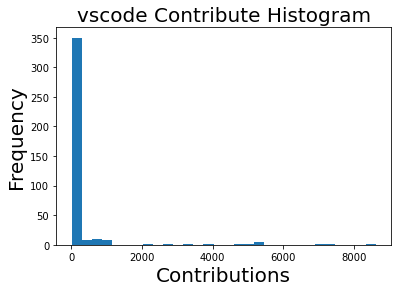

In [7]:

plt.title("{0} Contribute Histogram".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label

# show histogram bins=30
plt.hist(df.contributions, bins=30)

# 対数変換をかけてヒストグラム表示します
ばらつきが見やすくなりました。

(array([29., 74., 56., 59., 27., 23., 22., 13., 10.,  9.,  6.,  3.,  4.,
         5.,  4.,  2.,  0.,  4.,  6.,  2.,  4., 10.,  4.,  0.,  0.,  4.,
         2.,  4.,  6.,  6.]),
 array([ 1.        ,  1.4025104 ,  1.8050208 ,  2.2075312 ,  2.6100416 ,
         3.012552  ,  3.4150624 ,  3.8175728 ,  4.2200832 ,  4.6225936 ,
         5.025104  ,  5.4276144 ,  5.8301248 ,  6.2326352 ,  6.6351456 ,
         7.037656  ,  7.4401664 ,  7.8426768 ,  8.2451872 ,  8.6476976 ,
         9.050208  ,  9.4527184 ,  9.8552288 , 10.2577392 , 10.66024961,
        11.06276001, 11.46527041, 11.86778081, 12.27029121, 12.67280161,
        13.07531201]),
 <a list of 30 Patch objects>)

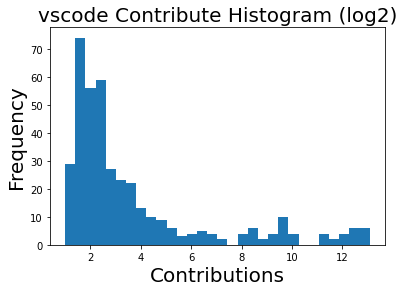

In [8]:
plt.title("{0} Contribute Histogram (log2)".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label
# show histogram for log2 bins=30
plt.hist(np.log2(df.contributions), bins=30)

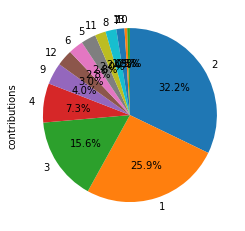

In [9]:
np.log2(df.contributions).astype(int) \
    .value_counts(normalize=True) \
    .plot.pie(counterclock=False, startangle=90, autopct="%1.1f%%")